# Predicting Heart Disease Using Machine Leaning

This notebook looks into using various Python-Based Machine learning and DataScience libraries in an attempt to build a machine learning model capable of predicting whether or not a person has heart disease based on their medical attributes.

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition
In a statement,

>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3.Evaluation
>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

Create data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
    * can range from mild symptoms to severe problems
    * signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
    * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
      2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [2]:
# regular data explorations imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

#models from Scikit-learn:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load data

In [5]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# lets find out exactly how many of each class there are:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

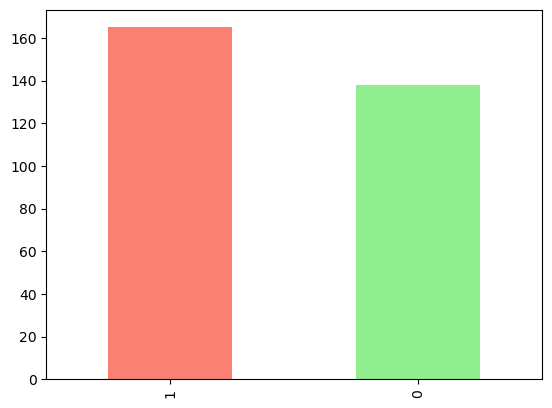

In [9]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightgreen"]);

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart-disease frequency according to sex

In [12]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


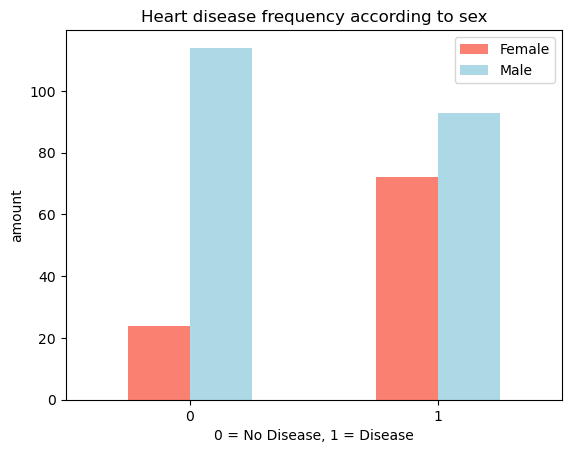

In [14]:
# Plotting the comparison:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", "lightblue"]);
plt.title("Heart disease frequency according to sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs max heart rate(thalach) for heart disease

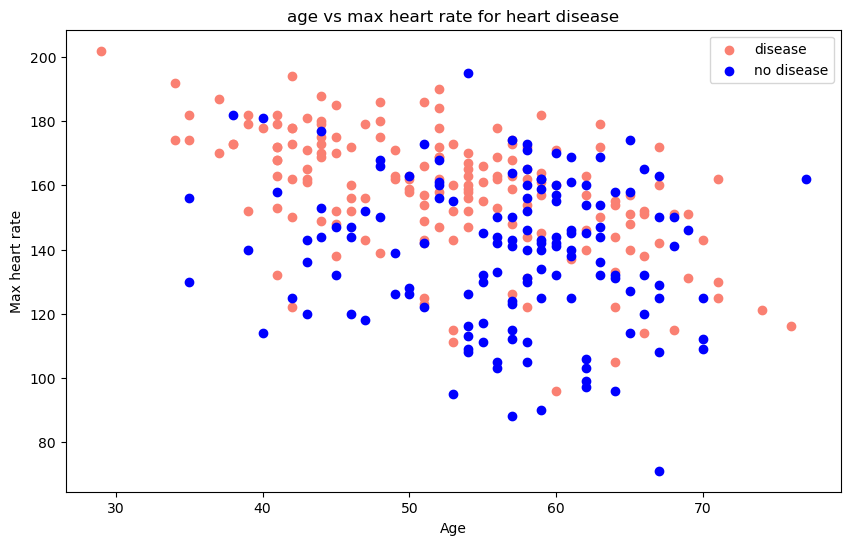

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c="salmon")

plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c="blue")
plt.title("age vs max heart rate for heart disease")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["disease", "no disease"]);

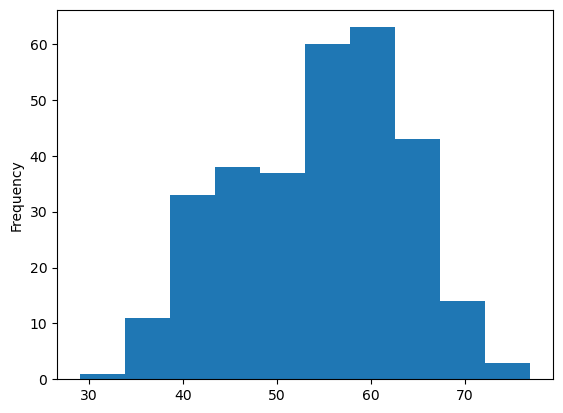

In [17]:
# distribution of age column:
df.age.plot.hist();

### Heart disease frequency per chest pain type

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


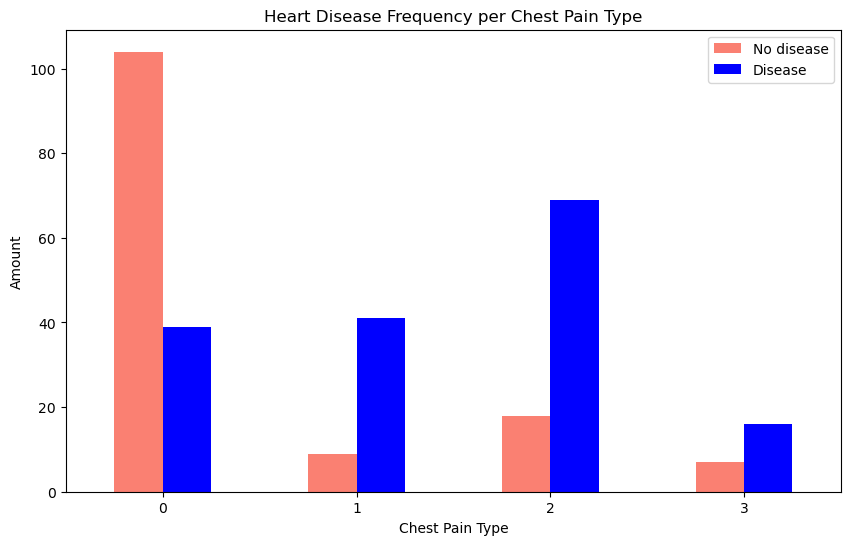

In [20]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "blue"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);

In [21]:
# correlation matrix:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


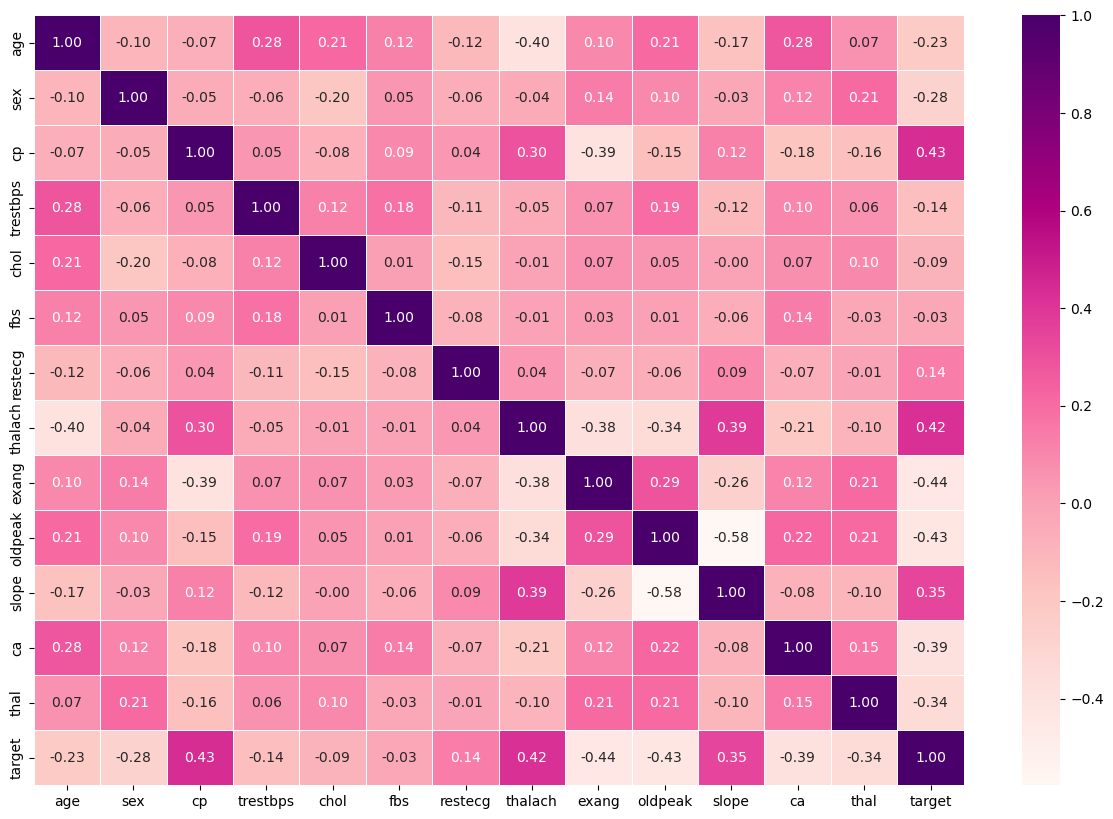

In [25]:
corr_matrix = df.corr()
fig, axes = plt.subplots(figsize=(15,10))
axes = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="RdPu");

# 5. Modelling

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
#split into X and y:
X = df.drop("target", axis=1)
y = df["target"]

In [31]:
np.random.seed(43)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### we're going to try 3 different machine learning algorithms:
1. KNearestNeighbors
2. RandomForestClassifier
3. LogisticRegression

In [33]:
#Put models in adictionary:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#create a function to fit and evaluate models:
def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    np.random.seed(43)
    #make a empty dict to store model scores:
    model_scores = {}
    #loop through models:
    for name,model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [37]:
model_scores = fit_and_evaluate(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

C:\Users\MAITHILI\Desktop\DataScience\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8852459016393442}

## Model Comparision

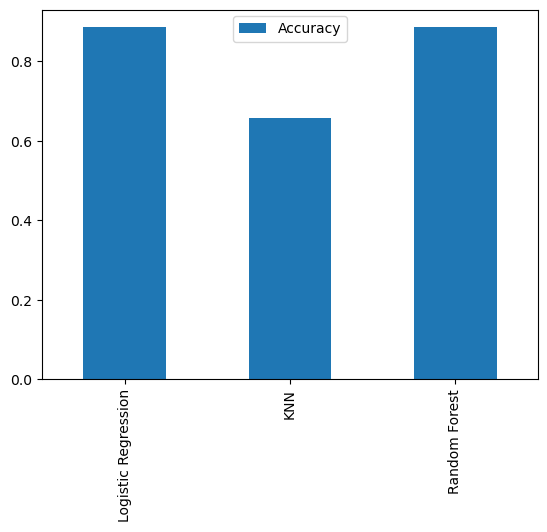

In [40]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

### Now let's look at the following things:

* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall 
* F1 Score
* Classification Report
* ROC Curve
* Area Under Curve(AUC)

### Hyperparameter tuning

In [41]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [42]:
test_scores

[0.6721311475409836,
 0.5409836065573771,
 0.6557377049180327,
 0.5901639344262295,
 0.6557377049180327,
 0.639344262295082,
 0.5901639344262295,
 0.639344262295082,
 0.6557377049180327,
 0.5737704918032787,
 0.6229508196721312,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.6065573770491803,
 0.6721311475409836,
 0.6721311475409836,
 0.639344262295082]

In [43]:
train_scores

[1.0,
 0.7644628099173554,
 0.7851239669421488,
 0.756198347107438,
 0.7396694214876033,
 0.7148760330578512,
 0.7148760330578512,
 0.7066115702479339,
 0.7066115702479339,
 0.7231404958677686,
 0.7148760330578512,
 0.7148760330578512,
 0.7272727272727273,
 0.7148760330578512,
 0.6818181818181818,
 0.6942148760330579,
 0.7066115702479339,
 0.7066115702479339,
 0.71900826446281,
 0.7148760330578512]

Maximum KNN score on the test data: 72.13%


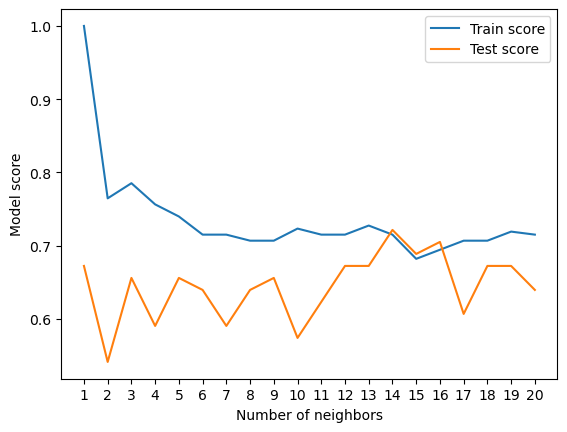

In [44]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [45]:
# now by using randomizedSearchCV we will evaluate logistic and randomforest 

log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# grid for randomforest:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [47]:
#tune Logistic regression:
np.random.seed(43)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
#fit the model:
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [49]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [48]:
rs_log_reg.score(X_test, y_test)

0.9016393442622951

In [50]:
#tuning Randomforest:
np.random.seed(43)
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [51]:
rs_rf.best_params_

{'n_estimators': 360,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 5}

In [52]:
rs_rf.score(X_test, y_test)

0.8852459016393442

## Hyperparameter tuning using GridSearchCV

Since our logistic regression model provides the best scores so far. we will try and improve that model only using GridSearchCV

In [53]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [54]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [55]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our  tuned machine learning model beyond accuarcy

In [56]:
# make predictions with tuned model:
y_preds = rs_log_reg.predict(X_test)
y_preds

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [57]:
y_test

242    0
130    1
208    0
160    1
124    1
      ..
176    0
65     1
11     1
67     1
185    0
Name: target, Length: 61, dtype: int64

C:\Users\MAITHILI\Desktop\DataScience\heart-disease\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


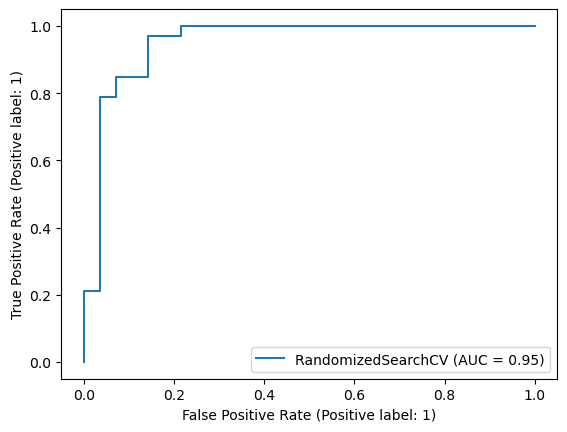

In [59]:
#Plot ROC curve and AUC:
plot_roc_curve(rs_log_reg, X_test, y_test);

In [60]:
# confusion matrix:
print(confusion_matrix(y_test, y_preds))

[[22  6]
 [ 0 33]]


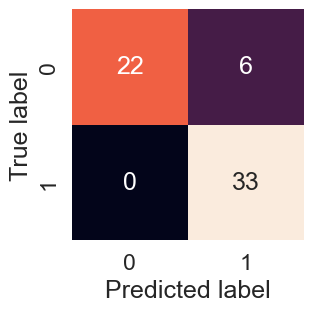

In [63]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot= True,
                    cbar=False)
    
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_preds)

In [64]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        28
           1       0.85      1.00      0.92        33

    accuracy                           0.90        61
   macro avg       0.92      0.89      0.90        61
weighted avg       0.92      0.90      0.90        61



In [65]:
# calculate evaluation metrics using cross-validation score:

#get our best hyperparameters:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [66]:
# create a new classifier with best parameters:
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")


In [75]:
# cross-validated accuracy:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [76]:
# cross-validated precision
cv_pre = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_pre = cv_pre.mean()
cv_pre

0.8215873015873015

In [77]:
# cross-validated recall:
cv_re = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_re = cv_re.mean()
cv_re

0.9272727272727274

In [79]:
# cross-validated f1 score:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = cv_pre.mean()
cv_f1

0.8215873015873015

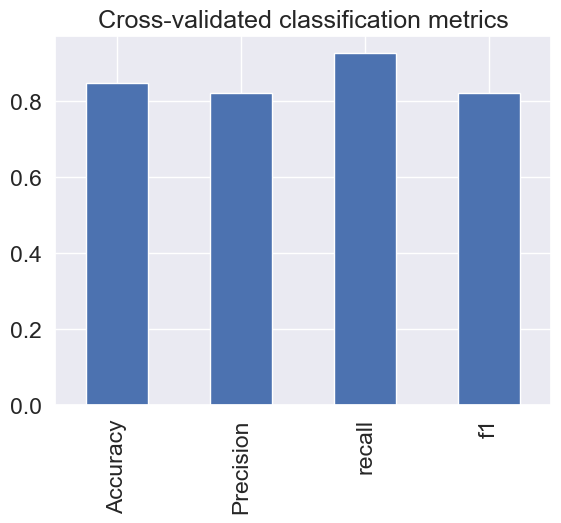

In [82]:
# visualize our cross-validated metrics:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_pre,
                          "recall": cv_re,
                          "f1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);